In [1]:
!wget -q https://raw.githubusercontent.com/ppkgtmm/ds-projects/main/deep-learning/sentiment-analysis/preprocessor.py
!wget -q https://raw.githubusercontent.com/ppkgtmm/ds-projects/main/deep-learning/sentiment-analysis/data_reader.py

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from preprocessor import Preprocessor
from data_reader import get_labels_and_texts
plt.style.use('fivethirtyeight')

In [3]:
train_size = 5e4
test_size = 5e3

train_labels, train_texts = get_labels_and_texts('../input/train.ft.txt.bz2', train_size)
test_labels, test_texts = get_labels_and_texts('../input/test.ft.txt.bz2', test_size)

In [4]:
train = pd.DataFrame({
    'text': train_texts,
    'target': train_labels
})

test = pd.DataFrame({
    'text': test_texts,
    'target': test_labels
})

train.head()

,text,target
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [5]:
prep = Preprocessor()
apply_prep = lambda x: prep.preprocess(x)
print("Before preprocessing")
display(train.iloc[2:3,0].values[0])

print("\nAfter preprocessing")
display(train.iloc[2:3,0].apply(apply_prep).values[0])

Before preprocessing


'Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I haven\'t heard the Xenogears soundtrack, so I can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.'


After preprocessing


'amazing this soundtrack is my favorite music of all time hands down the intense sadness of prisoners of fate which means all the more if you have played the game and the hope in a distant promise and girl who stole the star have been an important inspiration to me personally throughout my teen years the higher energy tracks like chrono cross time scar time of the dreamwatch and chronomantique indefinably remeniscent of chrono trigger are all absolutely superb as well this soundtrack is amazing music probably the best of this composer work i have not heard the xenogears soundtrack so i can not say for sure and even if you have never played the game it would be worth twice the price to buy it i wish i could give it NUMBER stars'

In [6]:
train['text'] = train['text'].apply(apply_prep)
test['text'] = test['text'].apply(apply_prep)

In [7]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

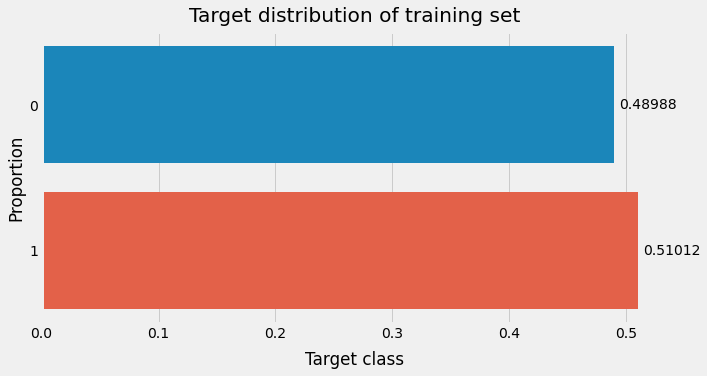

In [8]:
label_dist = train['target'].value_counts(normalize=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(y=label_dist.index, x=label_dist, orient='h')
ax.bar_label(ax.containers[0], padding=5)
plt.title('Target distribution of training set', pad=10)
plt.ylabel('Proportion')
plt.xlabel('Target class', labelpad=10)
plt.show()

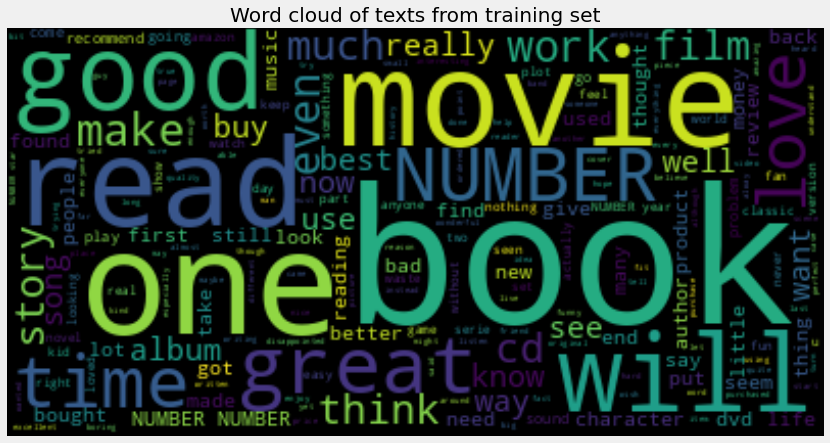

In [9]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(" ".join(train['text'].values))

plt.figure(figsize=(14,7))
plt.title('Word cloud of texts from training set')
plt.imshow(wordcloud, interpolation='bilinear') # interpolation = bilinear, blurs image
plt.axis("off")
plt.show()

In [10]:
MAX_FEATURES = 12000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_FEATURES, oov_token='<UNK>')
tokenizer.fit_on_texts(train['text'].values)

pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))